In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
assets = ['HDFCBANK.NS', 'RELIANCE.NS','TCS.NS']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [0]:
pf_data.head()

,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2010-01-04,132.501434,455.576172,280.091492
2010-01-05,132.617950,453.542938,280.166016
2010-01-06,132.707291,460.871063,273.831268
2010-01-07,133.052963,468.517029,266.210876
2010-01-08,133.227722,467.288605,260.770386


In [0]:
pf_data.tail()

,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2020-03-23,771.549988,884.049988,1669.699951
2020-03-24,767.700012,943.400024,1703.150024
2020-03-25,856.750000,1082.250000,1750.300049
2020-03-26,901.099976,1066.199951,1790.949951
2020-03-27,904.450012,1065.599976,1824.500000


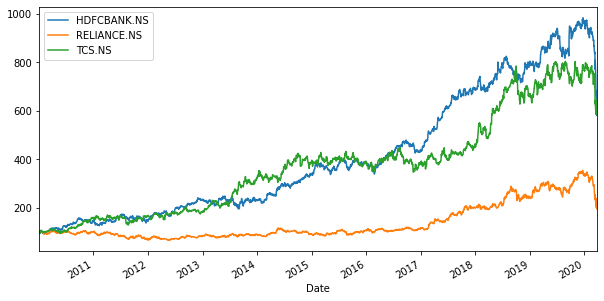

In [0]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [0]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [0]:
log_returns.mean() * 250

HDFCBANK.NS    0.190473
RELIANCE.NS    0.084265
TCS.NS         0.185833
dtype: float64

In [0]:
log_returns.cov() * 250

,HDFCBANK.NS,RELIANCE.NS,TCS.NS
HDFCBANK.NS,0.050204,0.027013,0.013260
RELIANCE.NS,0.027013,0.076937,0.017469
TCS.NS,0.013260,0.017469,0.064822


In [0]:
log_returns.corr()

,HDFCBANK.NS,RELIANCE.NS,TCS.NS
HDFCBANK.NS,1.000000,0.434646,0.232443
RELIANCE.NS,0.434646,1.000000,0.247370
TCS.NS,0.232443,0.247370,1.000000


In [0]:
num_assets = len(assets)

In [0]:
num_assets

3

In [0]:
arr = np.random.random(3)
arr

array([0.17298455, 0.91455466, 0.70852088])

In [0]:
arr[0] + arr[1] + arr[2]

1.7960600905964452

In [0]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.65984656, 0.04124219, 0.29891125])

In [0]:
weights[0] + weights[1] + weights[2]

1.0

Expected Portfolio Return:

In [0]:
np.sum(weights * log_returns.mean()) * 250

0.18470620825276765

Expected Portfolio Variance:

In [0]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.03491280343635629

Expected Portfolio Volatility:

In [0]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.18684968139217228

***

In [0]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.1674338293948943,
  0.1641974673438593,
  0.14444658721969877,
  0.14549848861513456,
  0.15190801851717334,
  0.1683726687795257,
  0.13051950658603775,
  0.14214755025310116,
  0.13066876943958752,
  0.14318236609094023,
  0.17382380796655744,
  0.1747203141118771,
  0.10749478638977752,
  0.17513445051712673,
  0.15202330405537806,
  0.15852136129720137,
  0.12165037893093532,
  0.14849768946670877,
  0.1581180625111242,
  0.185386768524091,
  0.15638804991965297,
  0.16757147542821046,
  0.15082809609406853,
  0.10971091459243403,
  0.13712787860984627,
  0.12140341275294911,
  0.1448835891016635,
  0.1512529195989816,
  0.17754205546388743,
  0.14239209304768352,
  0.12951629019019462,
  0.13727126096714806,
  0.1585975457537042,
  0.15269988478212013,
  0.18340840332716174,
  0.14501616390496314,
  0.13700219237421604,
  0.13972007452942828,
  0.14574355996149665,
  0.1429121461968894,
  0.1493711028791884,
  0.17423698610864383,
  0.15947557571412327,
  0.15269200281762776,


In [0]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.16338164, 0.13085226, 0.12558225, 0.16824273, 0.14759501,
        0.13870403, 0.14793359, 0.16719569, 0.11495149, 0.18755222,
        0.17784292, 0.16465808, 0.15272517, 0.11528605, 0.16840335,
        0.13874495, 0.14971889, 0.11605073, 0.15852232, 0.12318343,
        0.15967233, 0.1435882 , 0.17731521, 0.15003937, 0.14019972,
        0.17326689, 0.1265185 , 0.18412516, 0.1760281 , 0.15634772,
        0.15627647, 0.14689808, 0.1500213 , 0.18117724, 0.14066941,
        0.1506234 , 0.14255341, 0.1550247 , 0.17024858, 0.13365552,
        0.13591223, 0.16096888, 0.17267348, 0.14435856, 0.15831944,
        0.13830681, 0.10673552, 0.14557686, 0.12816491, 0.16413849,
        0.14218312, 0.14119905, 0.1349049 , 0.1299007 , 0.16243714,
        0.15525225, 0.18452859, 0.1468717 , 0.15166676, 0.12459576,
        0.16618121, 0.1627307 , 0.14950778, 0.14793867, 0.15132321,
        0.14482665, 0.15018358, 0.15545169, 0.13688252, 0.15265394,
        0.15431354, 0.1670312 , 0.17447584, 0.14

In [0]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [0]:
portfolios.head()

,Return,Volatility
0,0.163382,0.184699
1,0.130852,0.203784
2,0.125582,0.214664
3,0.168243,0.184965
4,0.147595,0.197721


In [0]:
portfolios.tail()

,Return,Volatility
995,0.152734,0.188469
996,0.150562,0.188109
997,0.148198,0.189698
998,0.149215,0.187522
999,0.134782,0.202546


Text(0, 0.5, 'Expected Return')

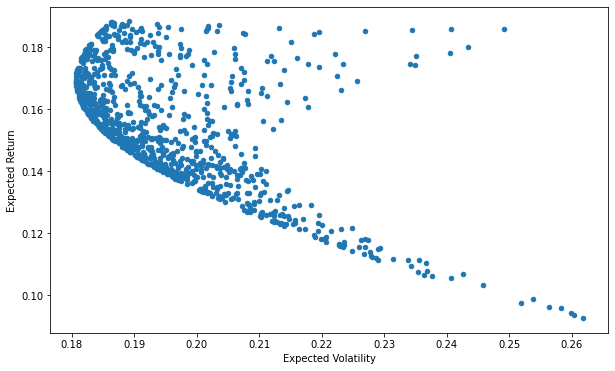

In [0]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

https://github.com/tthustla/efficient_frontier/blob/master/Efficient%20_Frontier_implementation.ipynb

In [0]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
import scipy.optimize as sco

plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:


assets = ['HDFCBANK.NS', 'RELIANCE.NS','TCS.NS']
data = pd.DataFrame()

for a in assets:
    data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']


data.head()

,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2010-01-04,132.501434,455.576172,280.091492
2010-01-05,132.617950,453.542938,280.166016
2010-01-06,132.707291,460.871063,273.831268
2010-01-07,133.052963,468.517029,266.210876
2010-01-08,133.227722,467.288605,260.770386


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2522 entries, 2010-01-04 to 2020-03-27
Data columns (total 3 columns):
HDFCBANK.NS    2522 non-null float64
RELIANCE.NS    2522 non-null float64
TCS.NS         2522 non-null float64
dtypes: float64(3)
memory usage: 78.8 KB


In [9]:
df = data
df.head()

,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2010-01-04,132.501434,455.576172,280.091492
2010-01-05,132.617950,453.542938,280.166016
2010-01-06,132.707291,460.871063,273.831268
2010-01-07,133.052963,468.517029,266.210876
2010-01-08,133.227722,467.288605,260.770386


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'price in $')

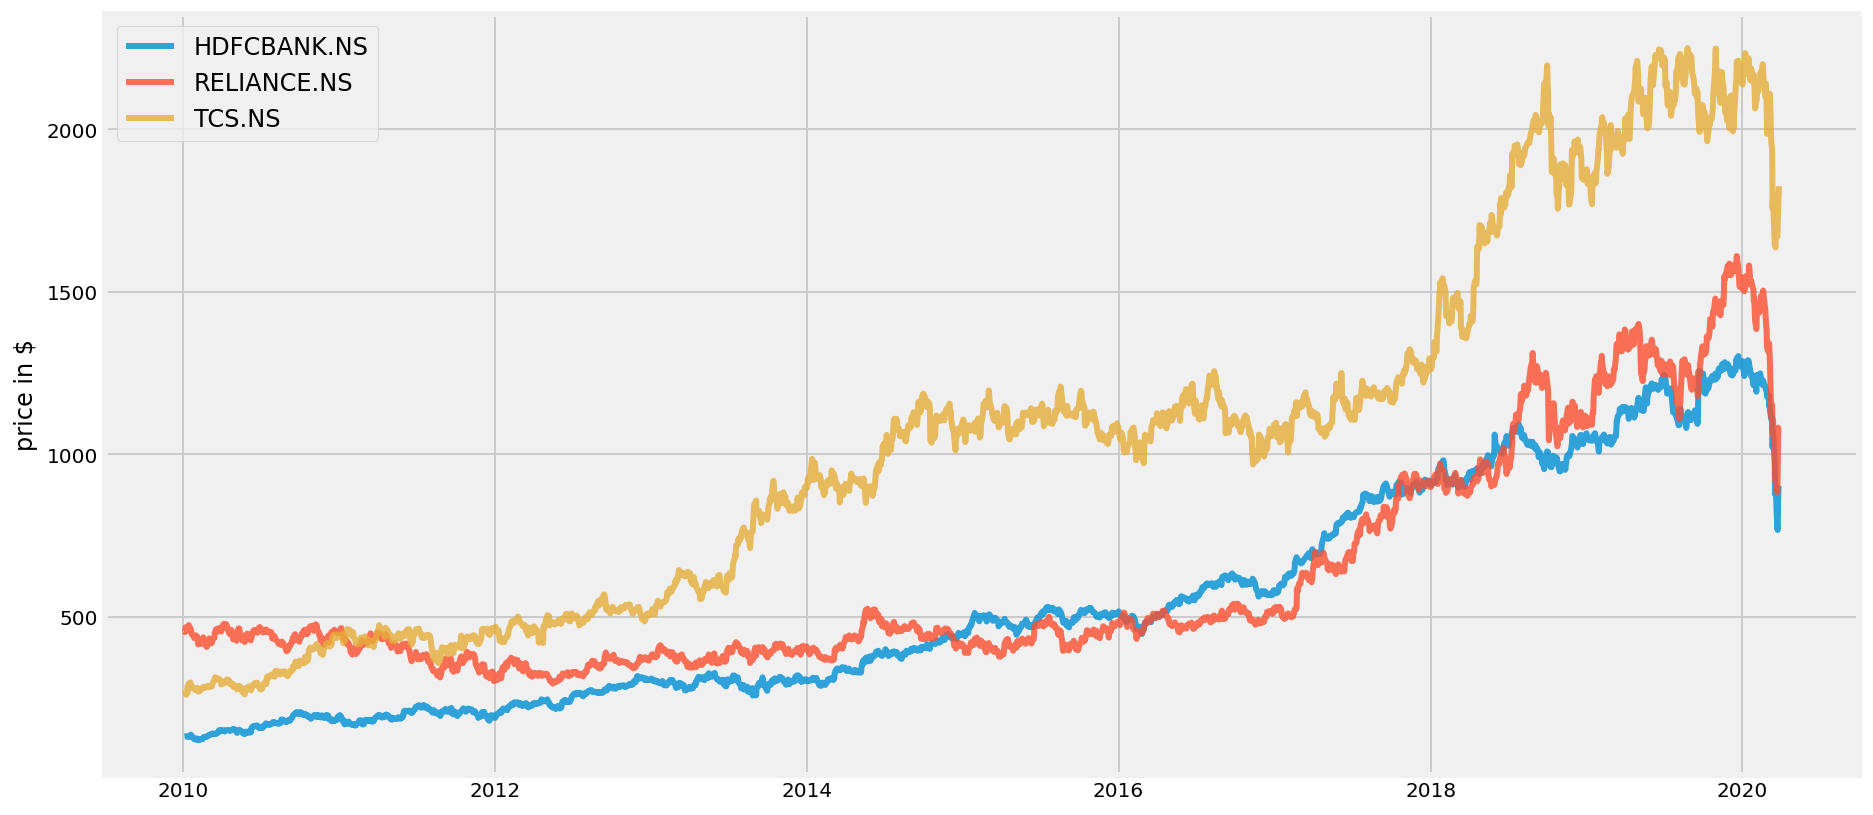

In [11]:
table = df
plt.figure(figsize=(14, 7))
for c in df.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'daily returns')

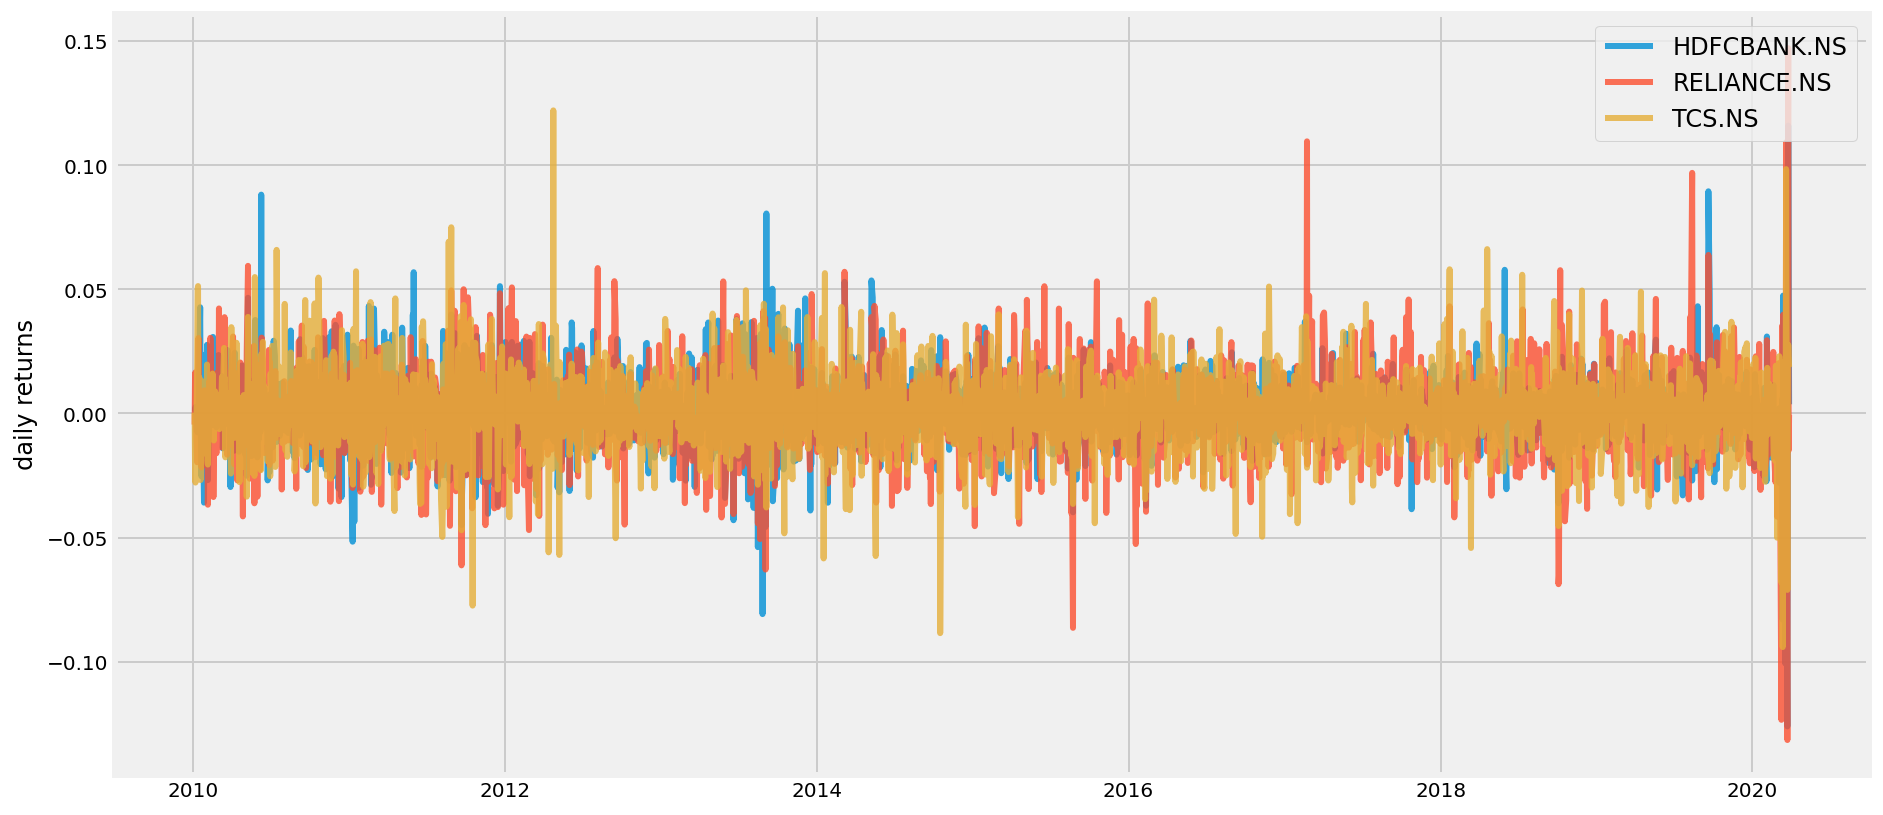

In [12]:
returns = table.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [0]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

In [0]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(3)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    #print(results,weights_record)
    return results, weights_record

In [0]:


returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 2522
risk_free_rate = 0.0178



In [0]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    #print(results, weights)
    max_sharpe_idx = np.argmax(results[2])
    #print(max_sharpe_idx)
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    #print(max_sharpe_allocation)
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    #print(min_vol_allocation)
    print("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print( max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.22
Annualised Volatility: 0.19


            HDFCBANK.NS  RELIANCE.NS  TCS.NS
allocation        57.39         0.56   42.05
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.2
Annualised Volatility: 0.18


            HDFCBANK.NS  RELIANCE.NS  TCS.NS
allocation        45.25        18.18   36.57


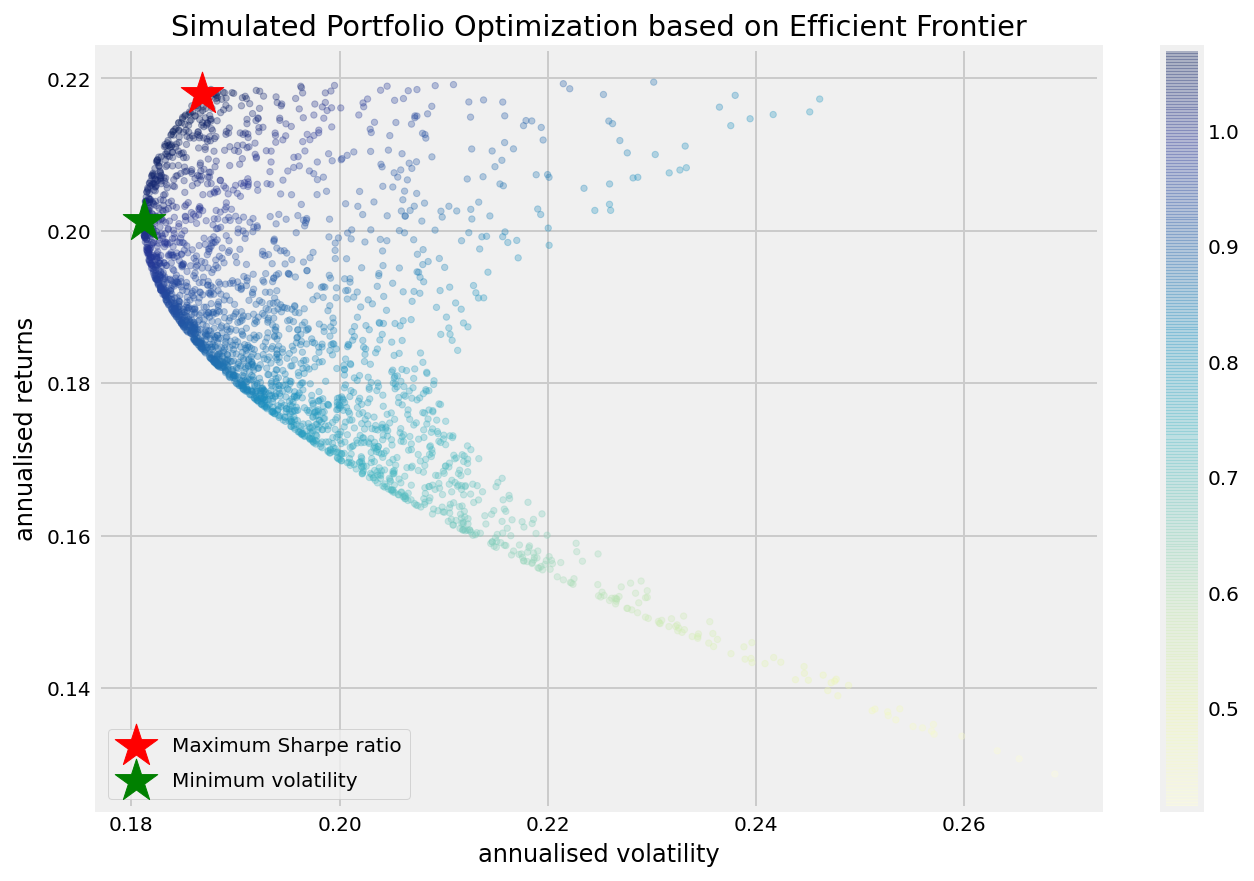

In [47]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)